In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
market = pd.read_csv("data/social_marketing.csv")

market = market.iloc[:, 1:]


market = market.transpose()

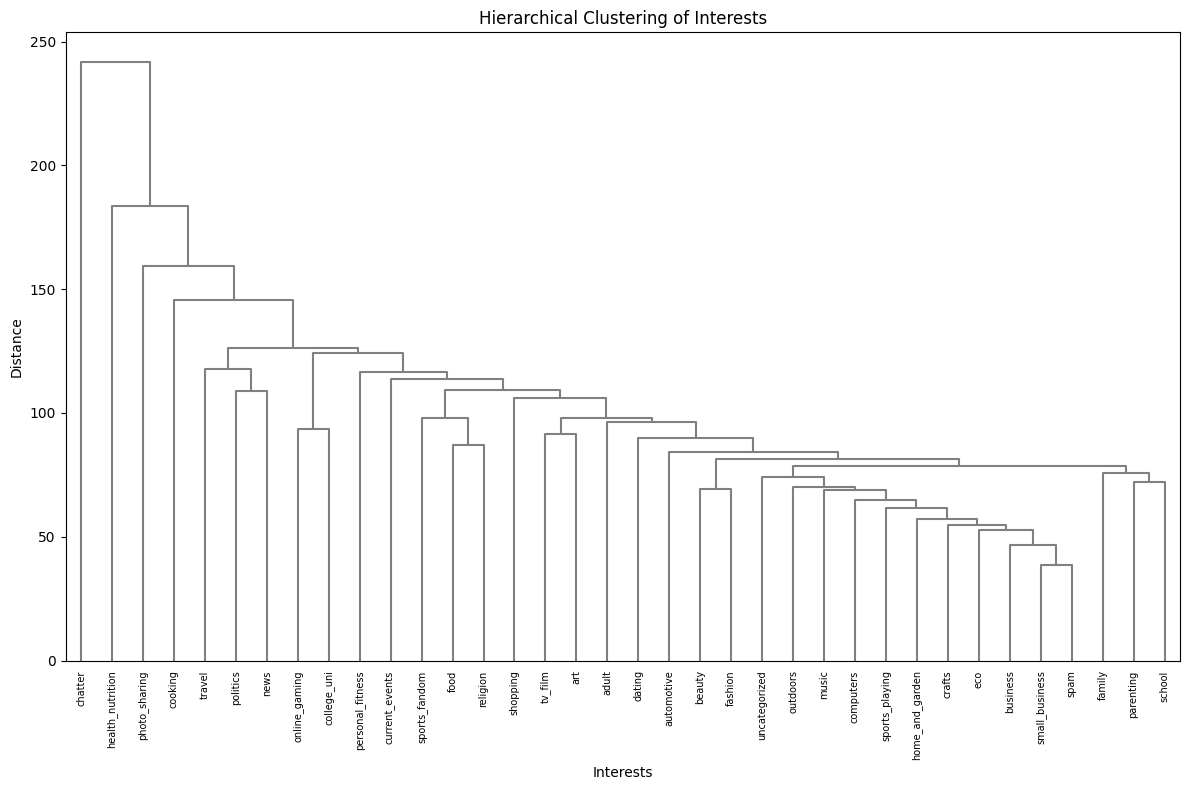

In [23]:
scaler = StandardScaler()
market_s = scaler.fit_transform(market)


dmat = pdist(market_s, metric='euclidean')


markclust = linkage(dmat, method="average")


plt.figure(figsize=(12, 8))  # Larger figure size
plt.title("Hierarchical Clustering of Interests")
plt.xlabel("Interests")
plt.ylabel("Distance")
dendrogram(markclust, labels=market.index, leaf_font_size=7, 
           above_threshold_color='grey', color_threshold=6)  # Adjusting colors and thresholds
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

I am defining market segment as a group of similar categories that are correlated. I scaled the data and ran a hierarchical clustering on the categories. It seems that the market is first split at chatter and everything else. Then moving on it has health nutrition then everything else. Some expected clusters are politics and news, family, parenting, and school, beauty and fashion. One interesting thing I found is that business and small businesses are close together, but small businesses are much more correlated with spam. Some other interesting points in the graph are food and religion are close together, which means alot of the talk is about religious food. The group could try to create some products advertised for specific religious meals.

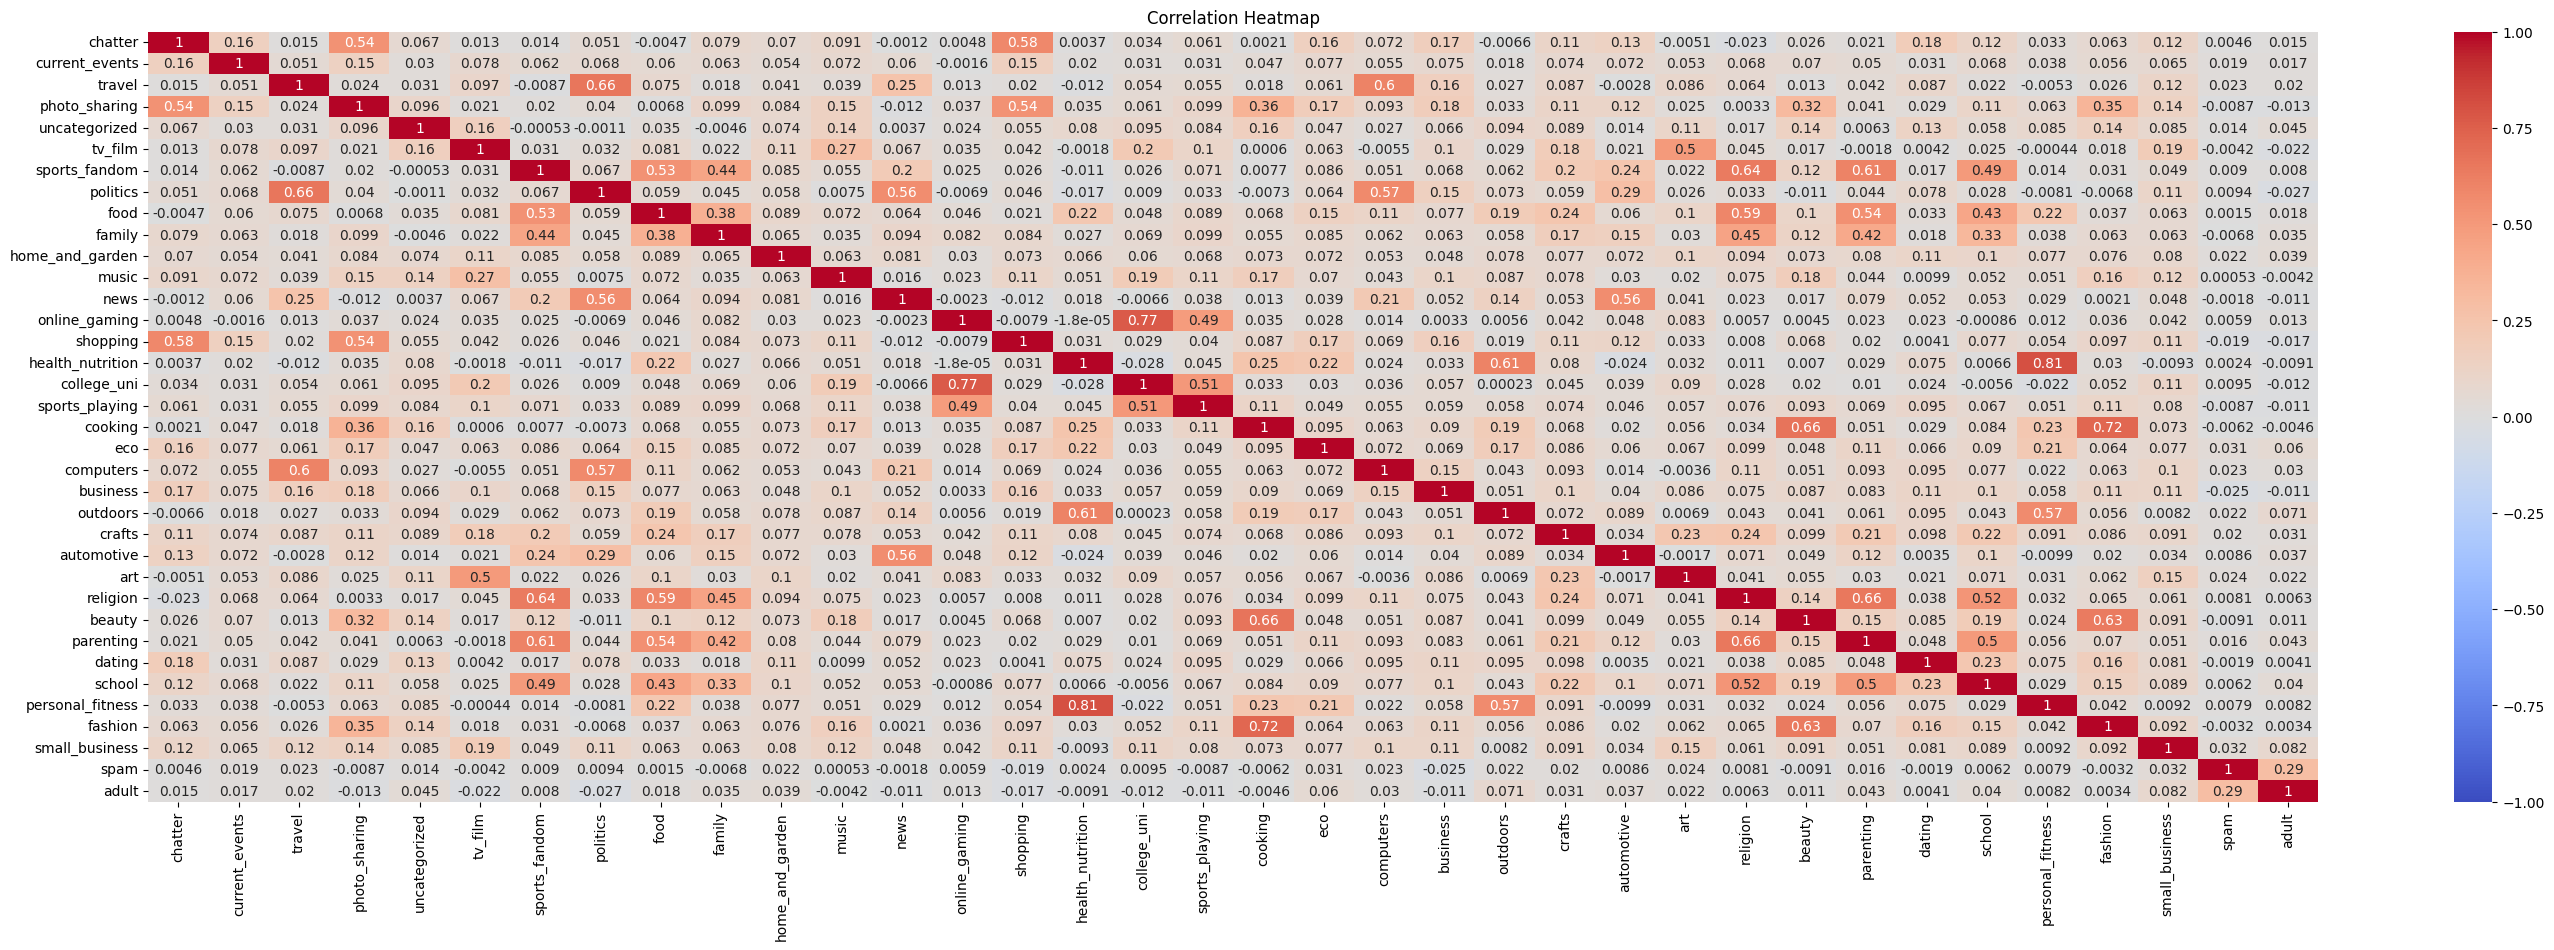

In [36]:
market = pd.read_csv("data/social_marketing.csv")
market = market.iloc[:, 1:]
correlation_matrix = market.corr()
plt.figure(figsize=(35, 10))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

Next, I created a heat map to see which are the most correlated categories. As you can see, the top correlations are health nutrition and personal fitness, which makes sense, as people who are into health probably want good fitness as well. College and gaming are also highly correlated which also makes sense as people who talk about college on Twitter are most likely referring collegiate E-Sports.

One interesting correlation is between cooking, beauty, and fashion. Although beauty and fashion are obviously correlated but having cooking in there is quite different. This could show that there is a market segment that has people who are into fashionable cookwear, which can be a great target.



In [33]:
category_sums = market.sum()
top_categories = category_sums.nlargest(5)
print("Top 5 most talked about categories:")
print(top_categories)

Top 5 most talked about categories:
photo_sharing       21256
health_nutrition    20235
cooking             15750
politics            14098
sports_fandom       12564
dtype: int64


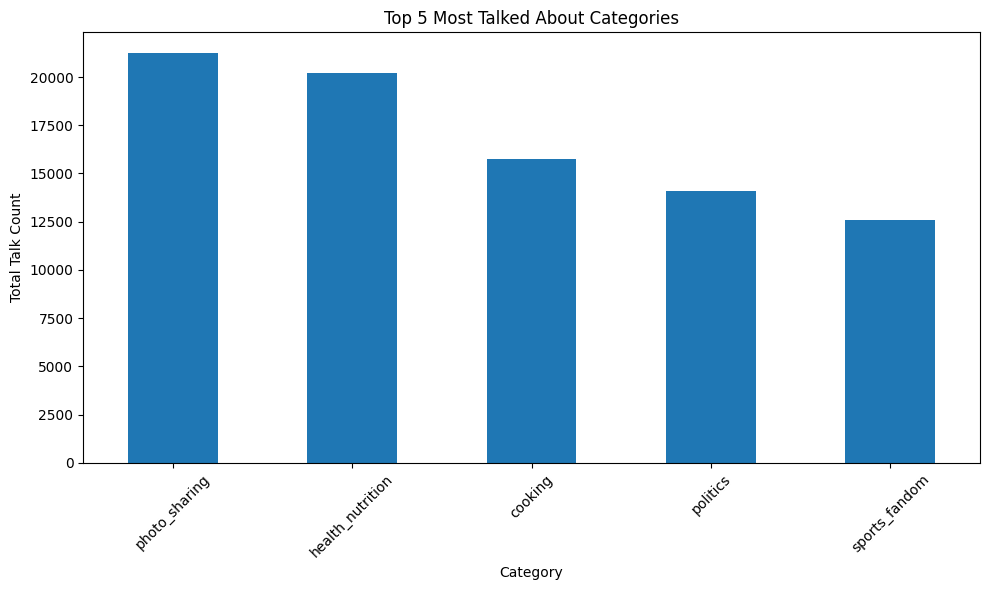

In [31]:
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')
plt.title("Top 5 Most Talked About Categories")
plt.xlabel("Category")
plt.ylabel("Total Talk Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The most popular categories are phot sharing, health nutrition, cooking, politics, sports fandoms. This means most of the followers like talking about these things. The company NutrientH20, should create products that support photo sharing in a healthy way. They can create products like cameras and advertise them by creating ads that show the cameras used to take pictures of various cooking. Politics and sports fandoms are a very divided group, but if NutrientH20 can find which political party the consumers support and same with sports, they can make a lot of money supporting that group.